In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf

sns.set_theme()

# данные по первому магазину

файл: shop_sales_dates.csv

- date: дата в формате «y-m-d»

- wm_yr_wk: идентификатор недели, к которой относится дата

- weekday: день недели (суббота, воскресенье, ..., пятница)

- wday: идентификатор дня недели, начиная с субботы

- month: месяц даты

- year: год даты

- event_name_1: если дата включает событие, название этого события

- event_type_1: если дата включает событие, тип этого события

- event_name_2: если дата включает второе событие, название этого события

- event_type_2: если дата включает второе событие, тип этого события

- date_id: идентификатор даты

In [2]:
dates = pd.read_csv('../data/shop_sales_dates.csv')  # даты и праздники
dates['date'] = pd.to_datetime(dates['date'])
dates.tail()

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
1814,2016-01-17,11551,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1815,0,0,0
1815,2016-01-18,11551,Monday,3,1,2016,MartinLutherKingDay,National,NaN,NaN,1816,0,0,0
1816,2016-01-19,11551,Tuesday,4,1,2016,NaN,NaN,NaN,NaN,1817,0,0,0
1817,2016-01-20,11551,Wednesday,5,1,2016,NaN,NaN,NaN,NaN,1818,0,0,0
1818,2016-01-21,11551,Thursday,6,1,2016,NaN,NaN,NaN,NaN,1819,0,0,0


In [3]:
print('event_name_1\n', dates['event_name_1'].unique(), '\n')
print('event_type_1\n', dates['event_type_1'].unique(), '\n')
print('event_name_2\n', dates['event_name_2'].unique(), '\n')
print('event_type_2\n', dates['event_type_2'].unique(), '\n')

event_name_1
 [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter'] 

event_type_1
 [nan 'Sporting' 'Cultural' 'National' 'Religious'] 

event_name_2
 [nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"] 

event_type_2
 [nan 'Cultural' 'Religious'] 



In [4]:
dates['event_name_1'] = dates['event_name_1'].combine_first(dates['event_name_2'])
dates = pd.get_dummies(dates, columns=['event_type_1'], prefix='type', dtype=int)
# оставляем только event_type, т.к. видов праздников многовато

dates['is_weekend'] = dates['wday'].apply(lambda x: 1 if x < 3 else 0)
# отдельно закодируем выходные дни

dates = dates.drop(
    columns=[
        'event_name_1',
        'event_name_2',
        'event_type_2',
        'CASHBACK_STORE_2',
        'CASHBACK_STORE_3',
    ]
)
dates.tail()

,date,wm_yr_wk,weekday,wday,month,year,date_id,CASHBACK_STORE_1,type_Cultural,type_National,type_Religious,type_Sporting,is_weekend
1814,2016-01-17,11551,Sunday,2,1,2016,1815,0,0,0,0,0,1
1815,2016-01-18,11551,Monday,3,1,2016,1816,0,0,1,0,0,0
1816,2016-01-19,11551,Tuesday,4,1,2016,1817,0,0,0,0,0,0
1817,2016-01-20,11551,Wednesday,5,1,2016,1818,0,0,0,0,0,0
1818,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0


файл: shop_sales_prices.csv

- store_id: идентификатор магазина, в котором продается товар

- item_id: идентификатор товара

- wm_yr_wk: идентификатор недели

- sell_price: цена товара для данной недели/магазина за неделю

In [5]:
prices = pd.read_csv('../data/shop_sales_prices.csv')
prices = prices[prices['store_id'] == 'STORE_1']
prices.tail()  # средняя стоимость единиц товаров в неделю

,store_id,item_id,wm_yr_wk,sell_price
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58
11140,STORE_1,STORE_1_727,11551,4.48


In [6]:
prices['item_id'].value_counts().to_frame()  # у одного товара меньше записей

,count
item_id,
STORE_1_064,260
STORE_1_065,260
STORE_1_376,260
STORE_1_090,260
STORE_1_252,260
STORE_1_339,260
STORE_1_546,260
STORE_1_547,260
STORE_1_555,260


Файл: shop_sales.csv

- item_id: идентификатор товара

- store_id: идентификатор магазина, в котором продается товар

- date_id: идентификатор даты

- cnt: количество единиц, проданных в день i

In [7]:
sales = pd.read_csv('../data/shop_sales.csv')
sales = sales[sales['store_id'] == 'STORE_1']
sales.tail()  # количество продаж артикулов

,item_id,store_id,date_id,cnt
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4
81854,STORE_1_727,STORE_1,1819,2


In [8]:
df = (
    dates.merge(sales, on='date_id')
    .merge(prices, on=['item_id', 'store_id', 'wm_yr_wk'], how='left')
    .sort_values(by='date')
)
df.tail()

,date,wm_yr_wk,weekday,wday,month,year,date_id,CASHBACK_STORE_1,type_Cultural,type_National,type_Religious,type_Sporting,is_weekend,item_id,store_id,cnt,sell_price
27271,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0,STORE_1_065,STORE_1,1,3.54
27270,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0,STORE_1_064,STORE_1,0,2.68
27283,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0,STORE_1_714,STORE_1,15,1.58
27276,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0,STORE_1_339,STORE_1,6,0.80
27284,2016-01-21,11551,Thursday,6,1,2016,1819,0,0,0,0,0,0,STORE_1_727,STORE_1,2,4.48


# маленький EDA

In [9]:
df['year'].value_counts().to_frame().sort_index()
# число записей о продажах отличается в первые и последний годы

,count
year,
2011,5055
2012,5490
2013,5475
2014,5475
2015,5475
2016,315


In [10]:
df['item_id'].value_counts().to_frame().sort_values(by='count')
# число записей о продаже артикулов

,count
item_id,
STORE_1_064,1819
STORE_1_727,1819
STORE_1_714,1819
STORE_1_587,1819
STORE_1_586,1819
STORE_1_555,1819
STORE_1_547,1819
STORE_1_584,1819
STORE_1_339,1819


In [11]:
print('всего записей:', df.shape[0])
print('пустых значений в:')
print(' - cnt:', sum(df['cnt'].isna()))
print(' - sell_price:', sum(df['sell_price'].isna()))
print(' - CASHBACK_STORE_1:', sum(df['CASHBACK_STORE_1'].isna()))
# пропуски в данных

всего записей: 27285
пустых значений в:
 - cnt: 0
 - sell_price: 189
 - CASHBACK_STORE_1: 0


In [12]:
print(df['CASHBACK_STORE_1'].value_counts())

CASHBACK_STORE_1
0    18285
1     9000
Name: count, dtype: int64


In [13]:
df.to_csv('../data/shop_sales_all.csv', index=False)

# визуализация временных рядов

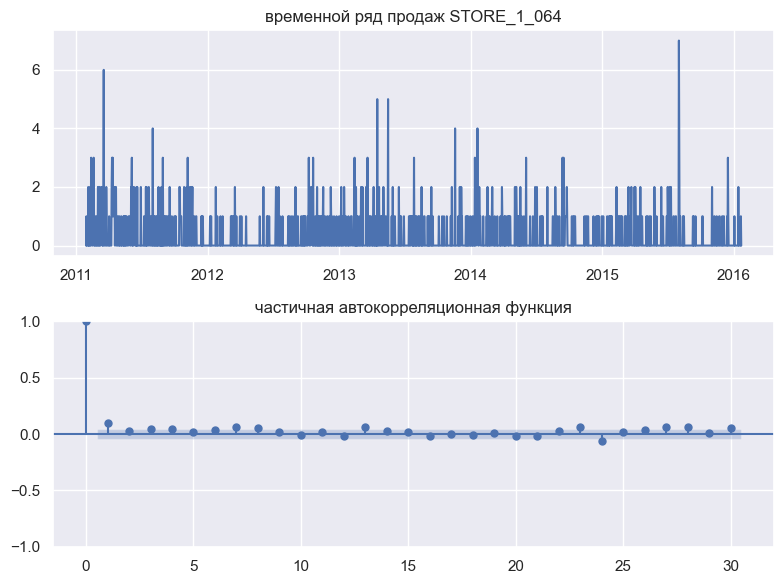

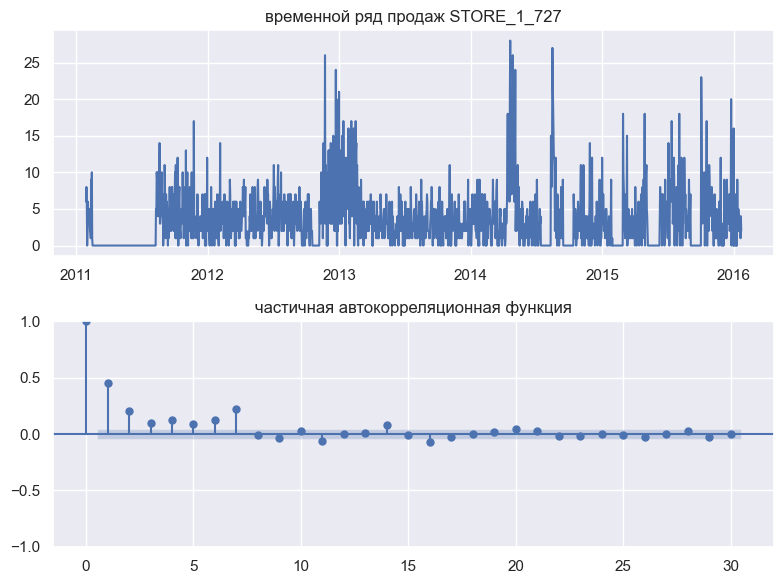

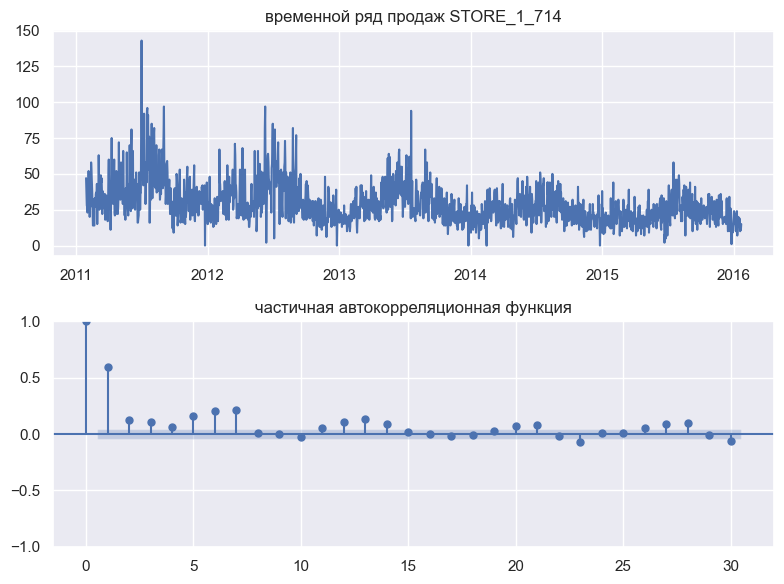

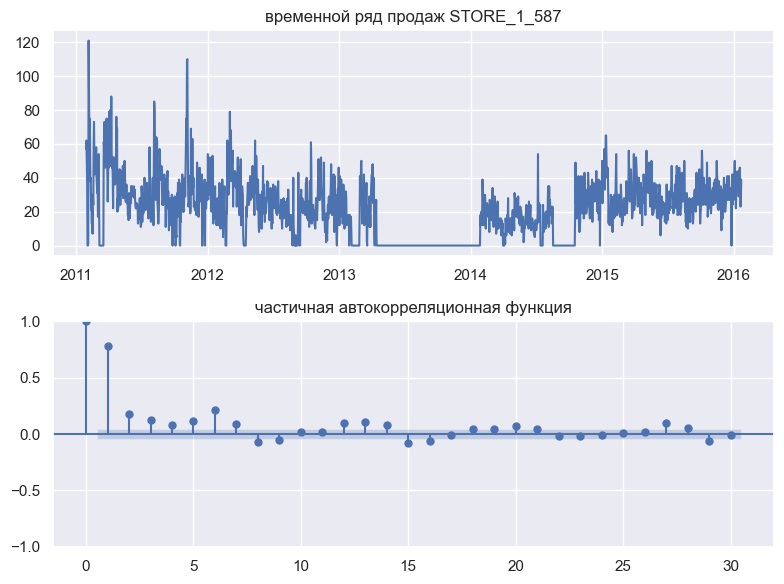

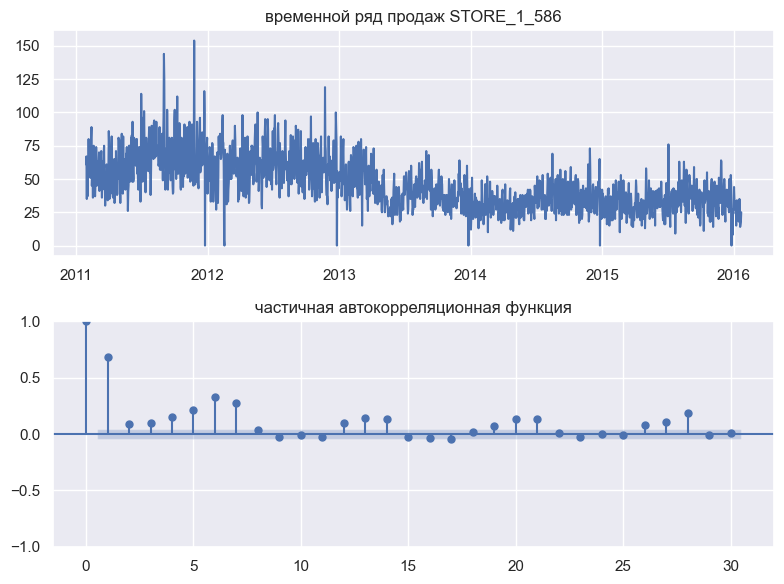

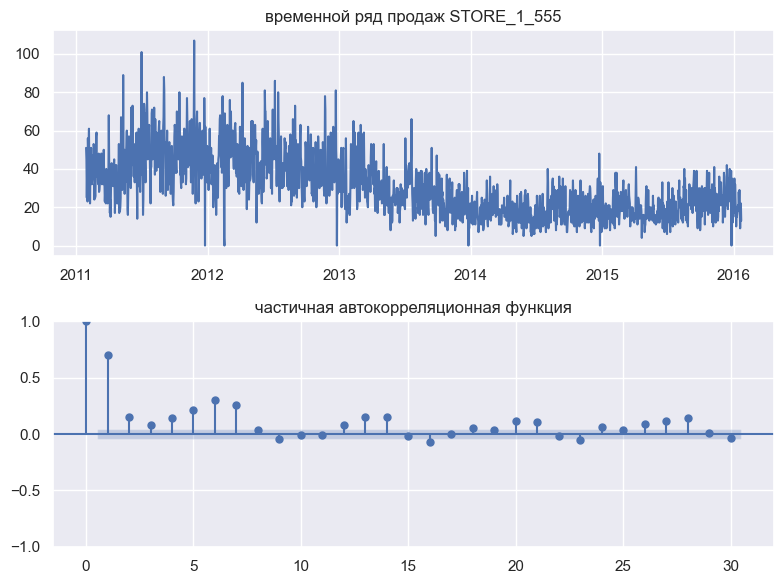

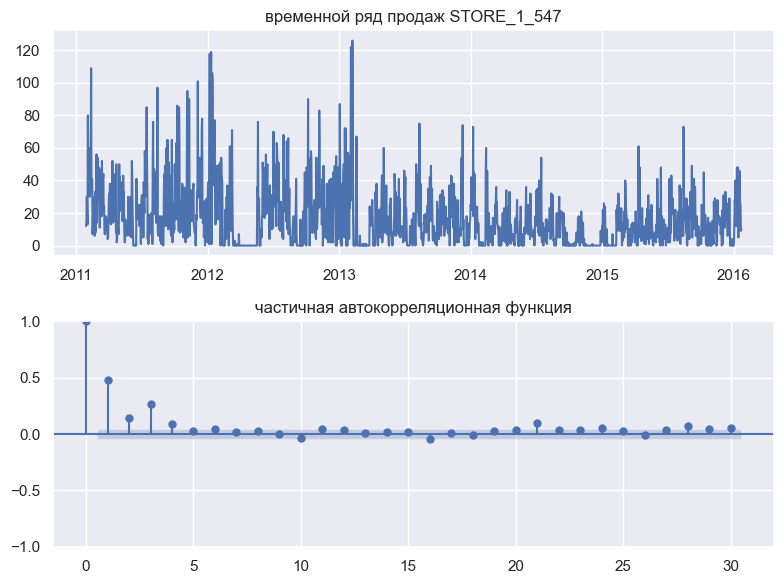

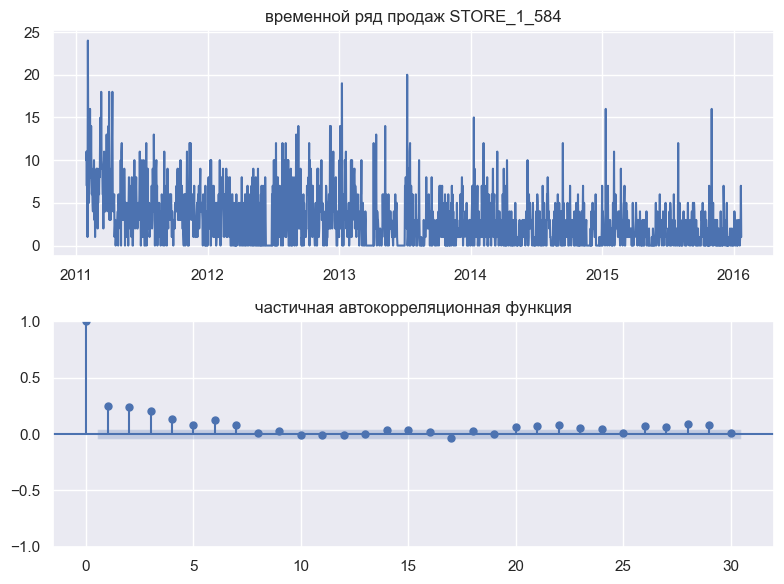

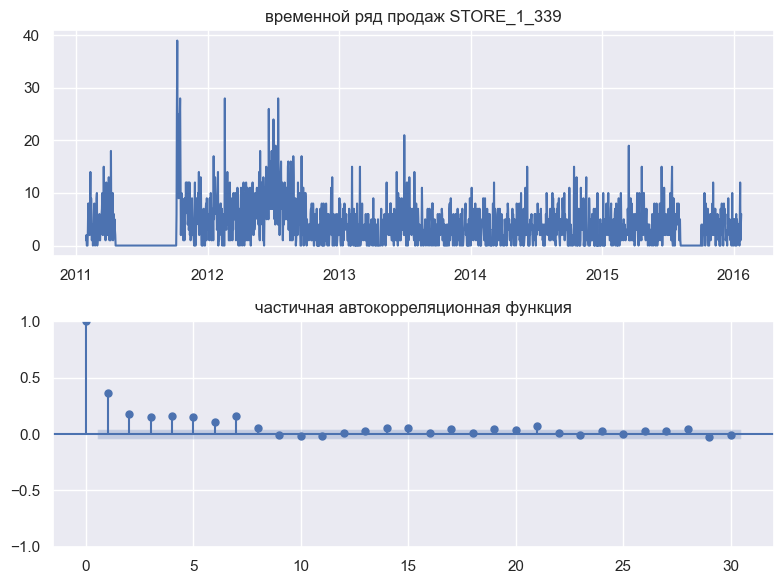

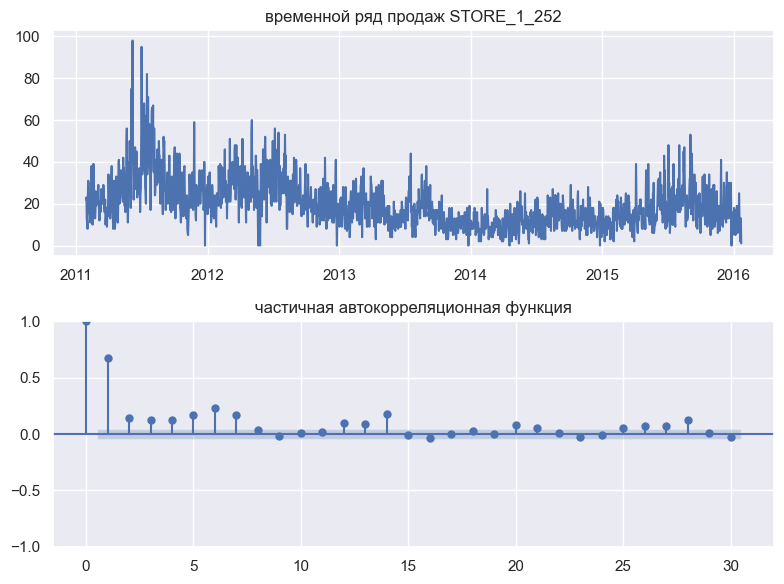

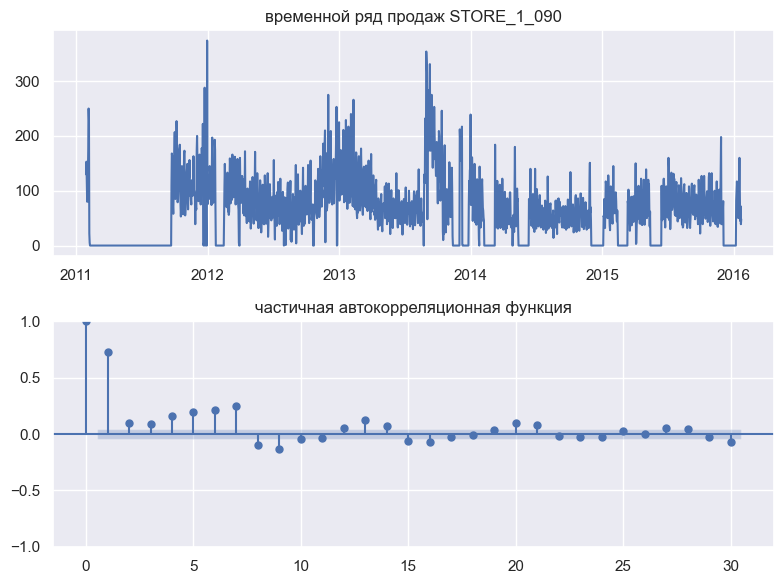

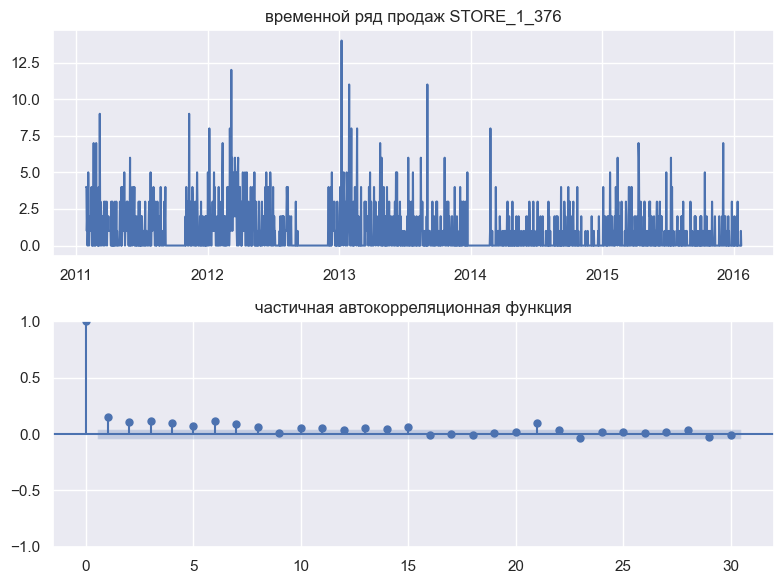

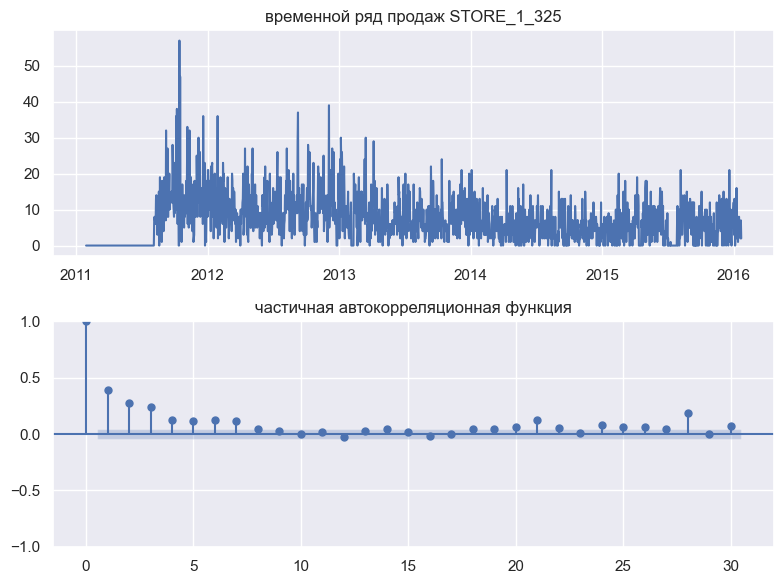

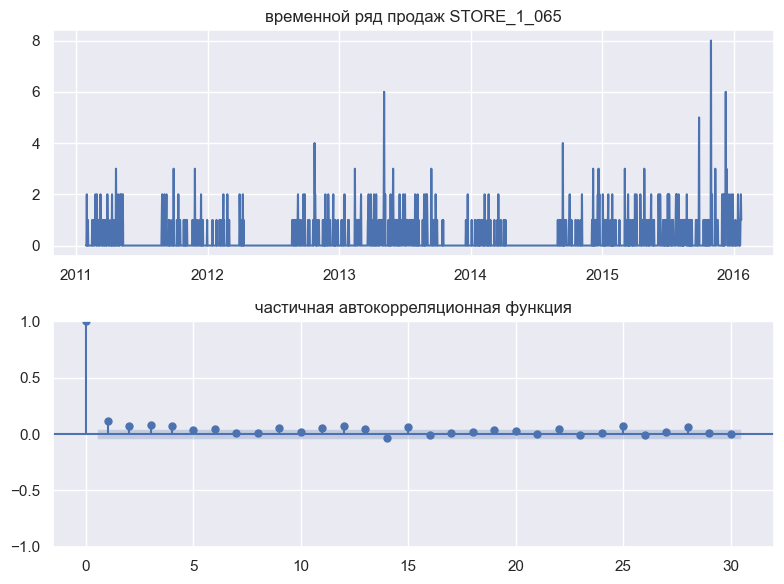

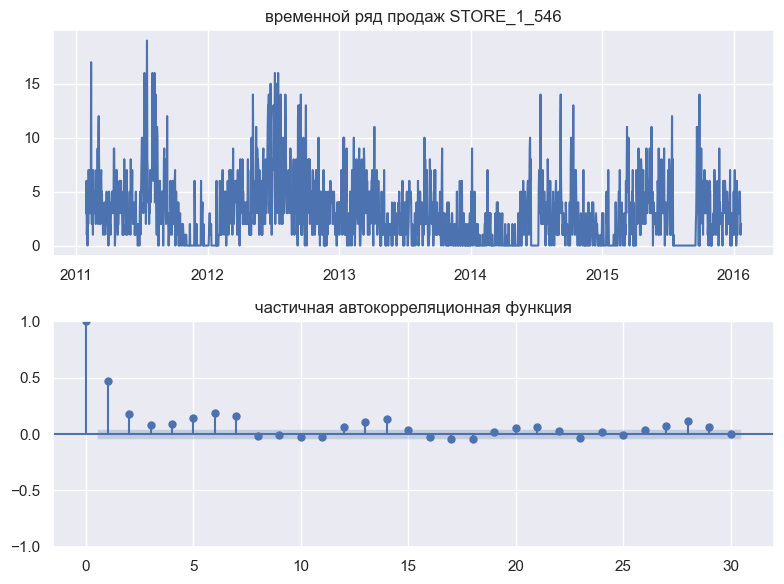

In [14]:
def plot_ts_pacf(series, item_id, pacf_lags=30):
    _, axes = plt.subplots(2, 1, figsize=(8, 6))

    axes[0].plot(series.date, series.cnt)
    axes[0].set_title(f'временной ряд продаж {item_id}')

    plot_pacf(series.cnt, lags=pacf_lags, ax=axes[1])
    axes[1].set_title('частичная автокорреляционная функция')

    plt.tight_layout()
    plt.show()


for art in df['item_id'].unique():
    df_art = df[(df['item_id'] == art)]
    plot_ts_pacf(df_art, art, pacf_lags=30)